# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    ray_params,
    double_parabolic_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/roulette/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=RouletteWheelSelectionFilter(roulette_pointer_count=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.85 and x[1] >= 0.85,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[grid_params],
        shape_gene_pool=[
            ray_params,     
            double_parabolic_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/roulette/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: RouletteWheelSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/roulette/config/biased_fitness

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

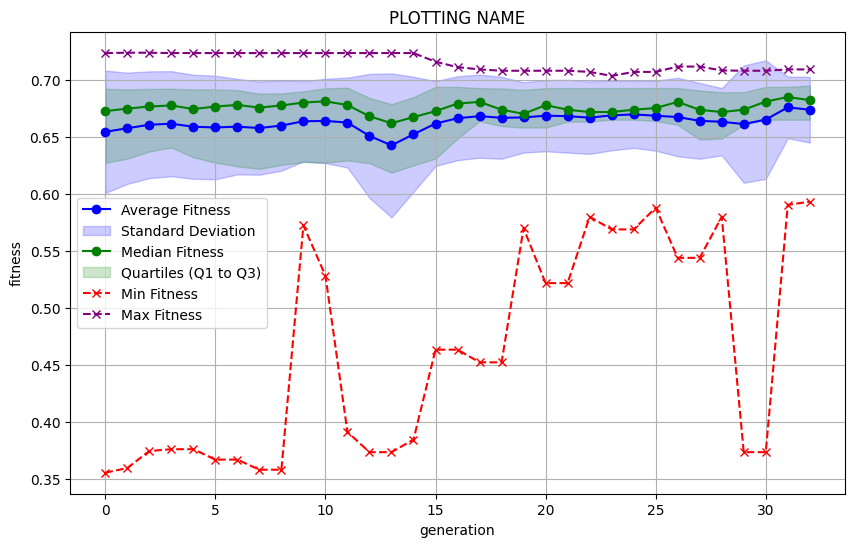

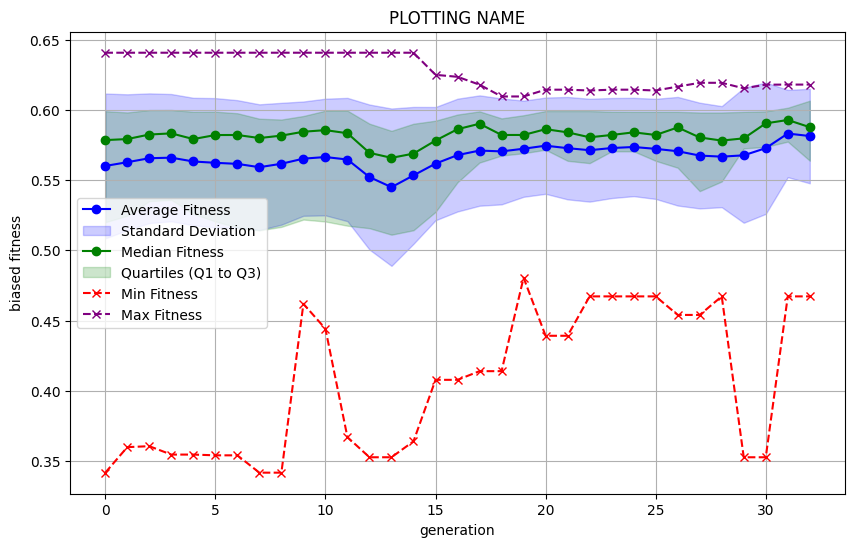

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_36: ['RayShape_301', 'GridStrictTransformation_325']
predict: (0.29405372102826854, 372.67606379999995, 455.5157490999999)
biased_fitness: 0.5588360884042407, fitness: 0.6685037252173153
shape parameter:
parameter_list: [ upper_slope: 1.9871328282748988, nose_point: 2.769913012830999, lower_coefficient: 3.069841299900212, lower_x-intercept: 1.79713333010675, lower_y-intercept: 1.473296879126617, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


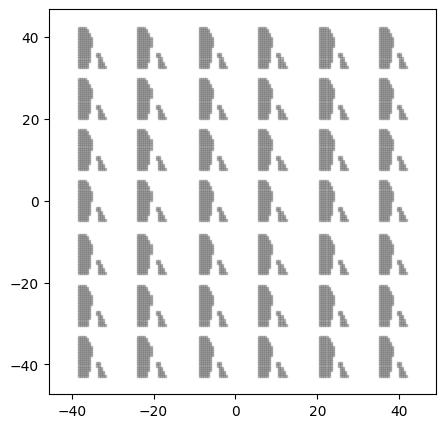

--------------------------------------------------
label: VentHole Chromosome_468: ['DoubleParabolicShape_152', 'GridStrictTransformation_36']
predict: (0.2917250808092611, 373.5790289999997, 459.8895357999999)
biased_fitness: 0.5781746520703465, fitness: 0.665406367907391
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


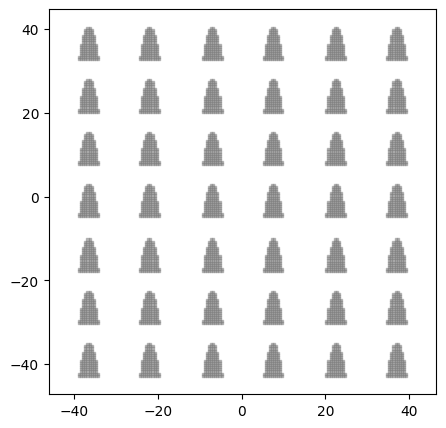

--------------------------------------------------
label: VentHole Chromosome_155: ['CircleShape_301', 'GridStrictTransformation_162']
predict: (0.2893046718760599, 373.18347819999985, 457.89011809999994)
biased_fitness: 0.618036966535162, fitness: 0.7015852997394019
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


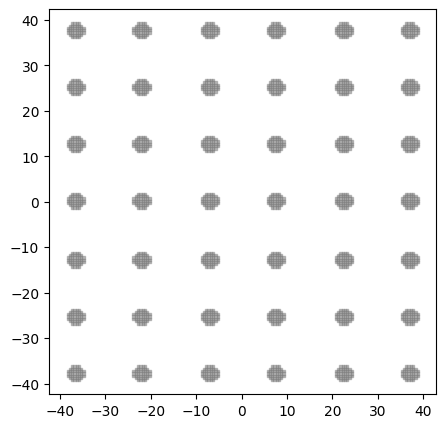

--------------------------------------------------
label: VentHole Chromosome_162: ['CircleShape_162', 'GridStrictTransformation_468']
predict: (0.29163938323888594, 373.2306705999999, 459.3684288999999)
biased_fitness: 0.5821584238555975, fitness: 0.6706106701111415
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


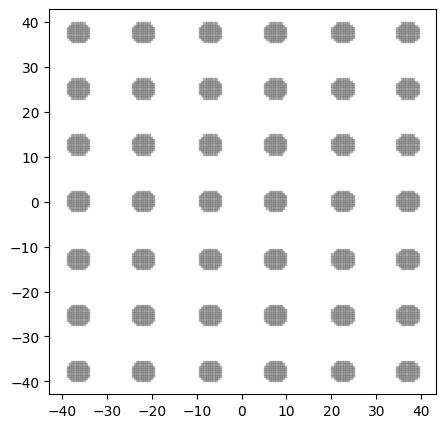

--------------------------------------------------
label: VentHole Chromosome_468: ['CircleShape_155', 'GridStrictTransformation_468']
predict: (0.29101759106344005, 372.92687959999995, 455.96023449999984)
biased_fitness: 0.5991988581118397, fitness: 0.6953885188656004
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


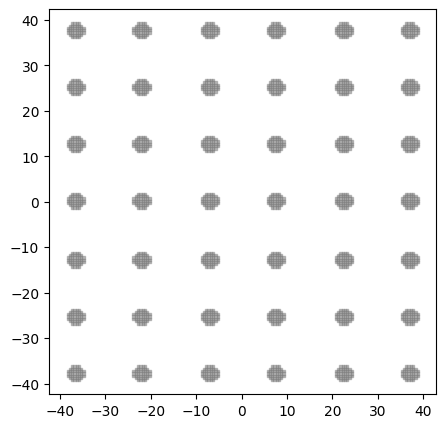

--------------------------------------------------
label: VentHole Chromosome_155: ['DoubleParabolicShape_155', 'GridStrictTransformation_354']
predict: (0.29149826902608744, 373.6628355999999, 460.4773827000001)
biased_fitness: 0.5797552902347761, fitness: 0.6643162182391257
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


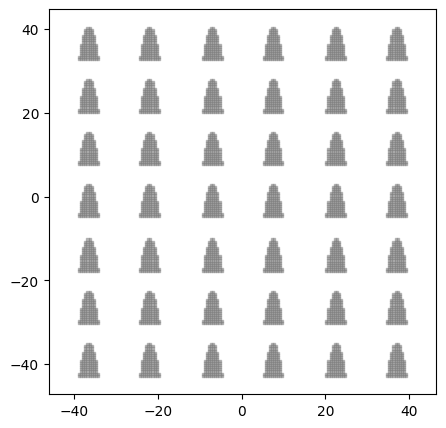

--------------------------------------------------
label: VentHole Chromosome_274: ['DoubleParabolicShape_155', 'GridStrictTransformation_152']
predict: (0.29143238214914713, 373.7881768999999, 460.0904518000001)
biased_fitness: 0.5808248618119405, fitness: 0.6662830350085287
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


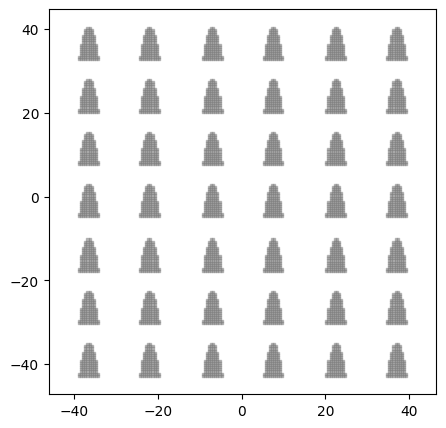

--------------------------------------------------
label: VentHole Chromosome_152: ['RayShape_468', 'GridStrictTransformation_301']
predict: (0.2925280149578251, 373.51131209999994, 461.60566079999984)
biased_fitness: 0.5638399084904491, fitness: 0.64913498592175
shape parameter:
parameter_list: [ upper_slope: 1.9871328282748988, nose_point: 2.769913012830999, lower_coefficient: 3.069841299900212, lower_x-intercept: 1.79713333010675, lower_y-intercept: 1.473296879126617, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


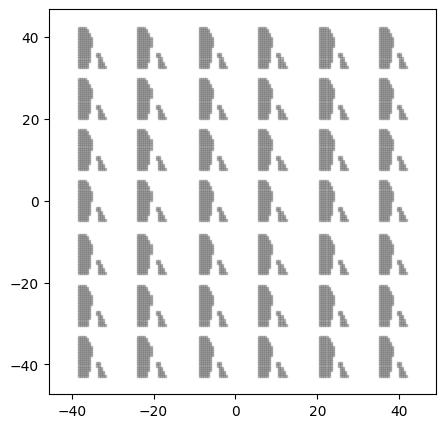

--------------------------------------------------
label: VentHole Chromosome_155: ['RayShape_152', 'GridStrictTransformation_155']
predict: (0.2905993980733381, 373.3465771999998, 456.9668711)
biased_fitness: 0.6009417987732673, fitness: 0.6924387777666198
shape parameter:
parameter_list: [ upper_slope: 1.9871328282748988, nose_point: 2.769913012830999, lower_coefficient: 3.069841299900212, lower_x-intercept: 1.79713333010675, lower_y-intercept: 1.473296879126617, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


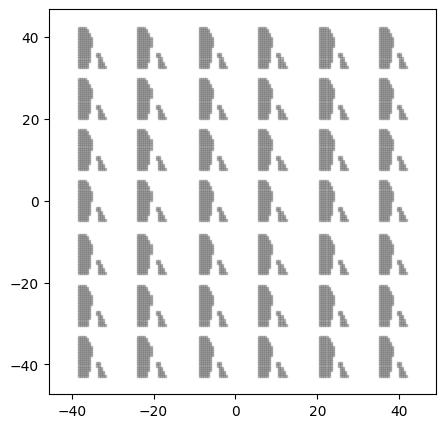

--------------------------------------------------
label: VentHole Chromosome_36: ['DoubleParabolicShape_468', 'GridStrictTransformation_387']
predict: (0.29075179357888103, 374.04959120000007, 460.76170020000006)
biased_fitness: 0.5877035334956648, fitness: 0.6684256072111888
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


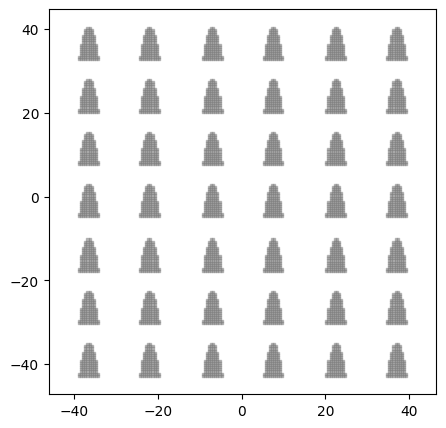

--------------------------------------------------
label: VentHole Chromosome_155: ['DoubleParabolicShape_36', 'GridStrictTransformation_155']
predict: (0.2932123974101044, 373.2004413000001, 457.6342695)
biased_fitness: 0.5637556907585377, fitness: 0.6637024718989554
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


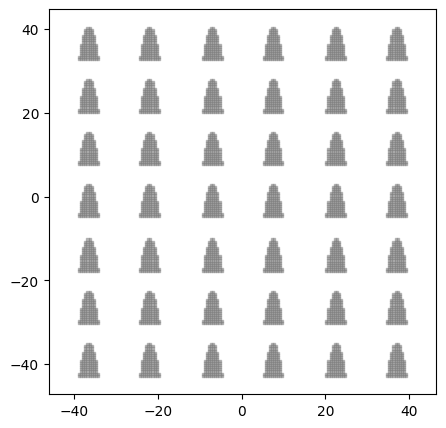

--------------------------------------------------
label: VentHole Chromosome_36: ['CircleShape_155', 'GridStrictTransformation_155']
predict: (0.2893046718760599, 373.18347819999985, 457.89011809999994)
biased_fitness: 0.618036966535162, fitness: 0.7015852997394019
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


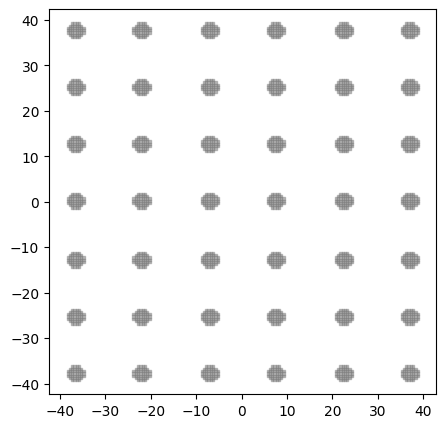

--------------------------------------------------
label: VentHole Chromosome_301: ['RayShape_155', 'GridStrictTransformation_36']
predict: (0.2921698144843978, 373.4140738, 456.3255464999999)
biased_fitness: 0.5799011352184306, fitness: 0.6796037536560221
shape parameter:
parameter_list: [ upper_slope: 1.9871328282748988, nose_point: 2.769913012830999, lower_coefficient: 3.069841299900212, lower_x-intercept: 1.79713333010675, lower_y-intercept: 1.473296879126617, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


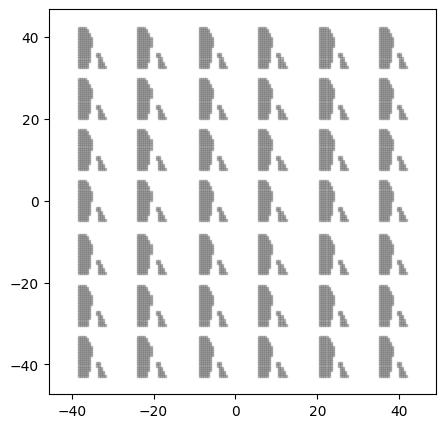

--------------------------------------------------
label: VentHole Chromosome_36: ['WingShape_468', 'GridStrictTransformation_468']
predict: (0.29288165588313486, 373.85149849999993, 454.3698579000001)
biased_fitness: 0.5716596093361119, fitness: 0.6800766591686511
shape parameter:
parameter_list: [ c: 4.433026934336049, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


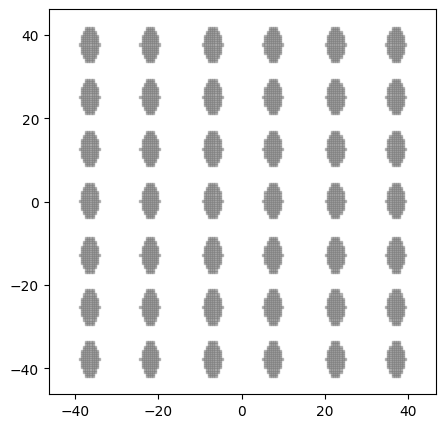

--------------------------------------------------
label: VentHole Chromosome_152: ['TrapezoidShape_468', 'GridStrictTransformation_155']
predict: (0.2977132670400129, 372.5782625, 456.955529)
biased_fitness: 0.5052118909398196, fitness: 0.6251983720998711
shape parameter:
parameter_list: [ k1: 3.9253962334162047, k2: 2.5290527127111653, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


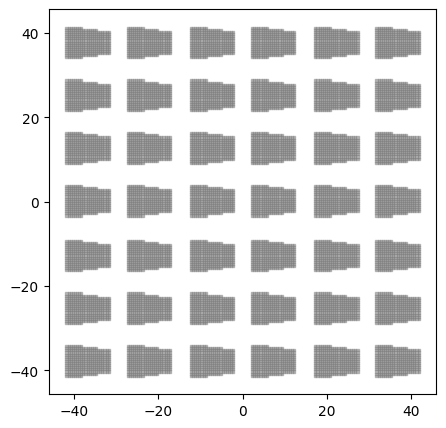

--------------------------------------------------
label: VentHole Chromosome_385: ['TrapezoidShape_152', 'GridStrictTransformation_155']
predict: (0.299979909117007, 373.43824090000015, 457.9305380000003)
biased_fitness: 0.4672289918619004, fitness: 0.5933570143299276
shape parameter:
parameter_list: [ k1: 3.9253962334162047, k2: 2.5290527127111653, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


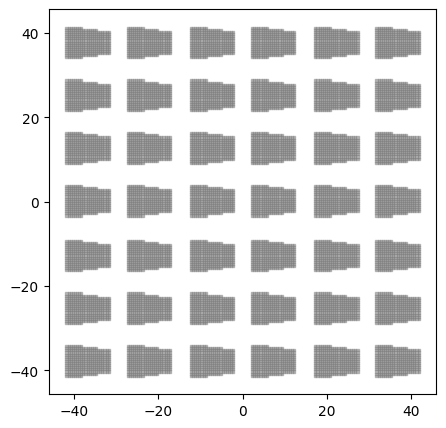

--------------------------------------------------
label: VentHole Chromosome_155: ['WingShape_290', 'GridStrictTransformation_152']
predict: (0.29348101050251296, 373.37217759999993, 460.4487952)
biased_fitness: 0.5535073745648187, fitness: 0.6460850309748706
shape parameter:
parameter_list: [ c: 4.433026934336049, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


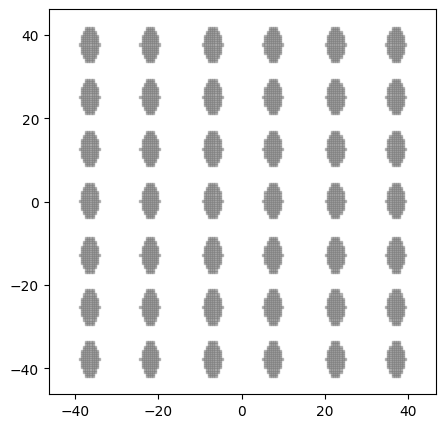

--------------------------------------------------
label: VentHole Chromosome_155: ['DonutShape_468', 'GridStrictTransformation_36']
predict: (0.29602240882453157, 373.4478955, 462.0482977)
biased_fitness: 0.5143502035565579, fitness: 0.6122949457546842
shape parameter:
parameter_list: [ r_inner: 4.1694065966568505, r_outer: 7.075819193321347, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


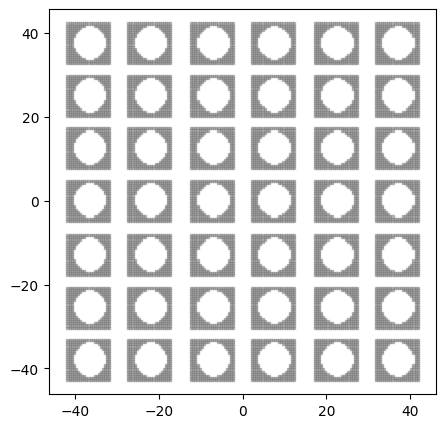

--------------------------------------------------
label: VentHole Chromosome_155: ['DoubleParabolicShape_274', 'GridStrictTransformation_155']
predict: (0.29149826902608744, 373.6628355999999, 460.4773827000001)
biased_fitness: 0.5797552902347761, fitness: 0.6643162182391257
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


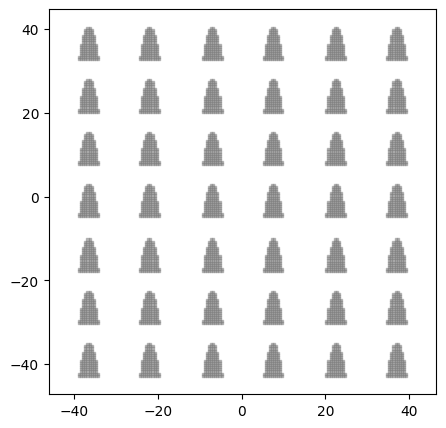

--------------------------------------------------
label: VentHole Chromosome_115: ['CircleShape_36', 'GridStrictTransformation_152']
predict: (0.2912969763106017, 373.0982581999999, 457.5223820999999)
biased_fitness: 0.5913062764515767, fitness: 0.6839270353939839
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


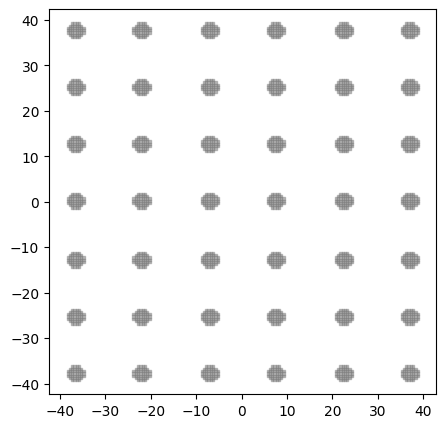

--------------------------------------------------
label: VentHole Chromosome_36: ['WingShape_468', 'GridStrictTransformation_36']
predict: (0.2904849868419337, 373.1294935, 454.6445471999999)
biased_fitness: 0.6082736223129283, fitness: 0.7062799280806633
shape parameter:
parameter_list: [ c: 4.433026934336049, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


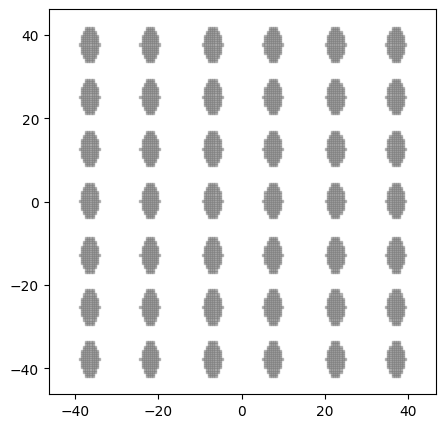

--------------------------------------------------
label: VentHole Chromosome_155: ['WingShape_36', 'GridStrictTransformation_36']
predict: (0.29011564734836304, 372.66585169999985, 455.61988309999964)
biased_fitness: 0.6138119124229189, fitness: 0.7074148525163722
shape parameter:
parameter_list: [ c: 4.433026934336049, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


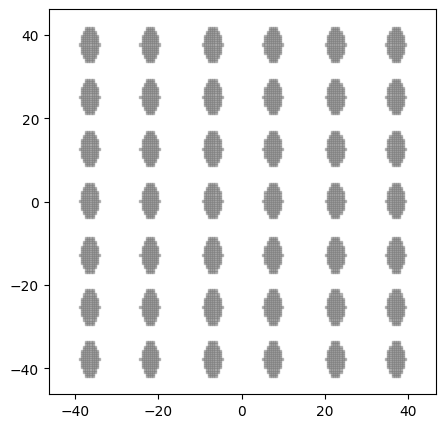

--------------------------------------------------
label: VentHole Chromosome_155: ['DonutShape_155', 'GridStrictTransformation_155']
predict: (0.29652205169583423, 373.4668924000001, 462.49653000000006)
biased_fitness: 0.5063637542583198, fitness: 0.6049623710416566
shape parameter:
parameter_list: [ r_inner: 4.1694065966568505, r_outer: 7.075819193321347, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


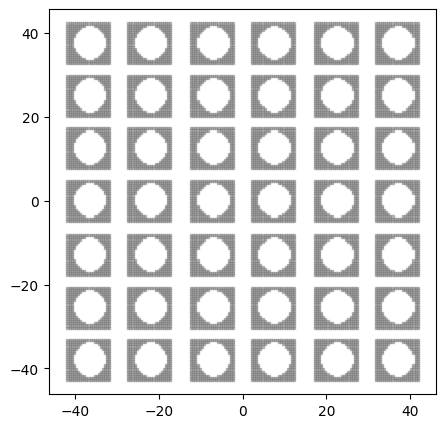

--------------------------------------------------
label: VentHole Chromosome_354: ['DonutShape_155', 'GridStrictTransformation_155']
predict: (0.29650143677211704, 374.7895318000002, 461.0494663)
biased_fitness: 0.5029332935903603, fitness: 0.6057906417788285
shape parameter:
parameter_list: [ r_inner: 4.1694065966568505, r_outer: 7.075819193321347, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


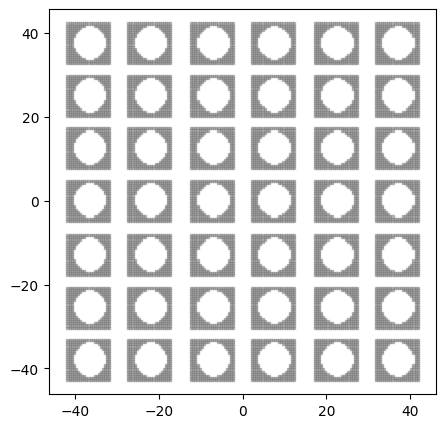

--------------------------------------------------
label: VentHole Chromosome_468: ['WingShape_155', 'GridStrictTransformation_354']
predict: (0.2912364512570744, 373.2869237, 457.5784938)
biased_fitness: 0.591098076300958, fitness: 0.6833083999292557
shape parameter:
parameter_list: [ c: 4.433026934336049, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


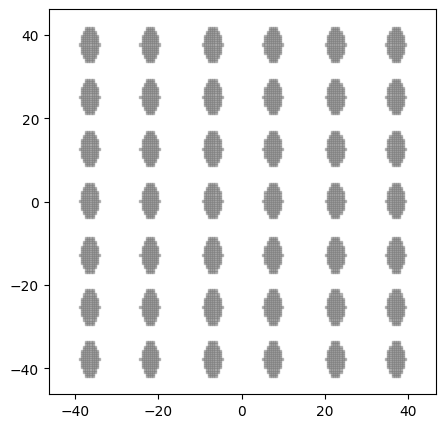

--------------------------------------------------
label: VentHole Chromosome_155: ['TrapezoidShape_155', 'GridStrictTransformation_155']
predict: (0.2977814788601245, 372.68017639999994, 461.0820285999999)
biased_fitness: 0.4954943567582572, fitness: 0.6033741863987556
shape parameter:
parameter_list: [ k1: 3.9253962334162047, k2: 2.5290527127111653, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


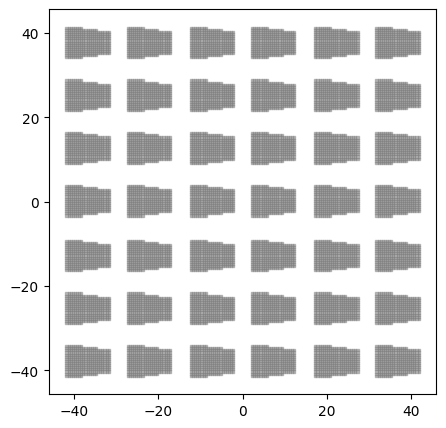

--------------------------------------------------
label: VentHole Chromosome_36: ['TrapezoidShape_36', 'GridStrictTransformation_325']
predict: (0.29569400993570283, 373.6180833000001, 461.98331549999983)
biased_fitness: 0.5182268134001602, fitness: 0.6150529066429721
shape parameter:
parameter_list: [ k1: 3.9253962334162047, k2: 2.5290527127111653, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


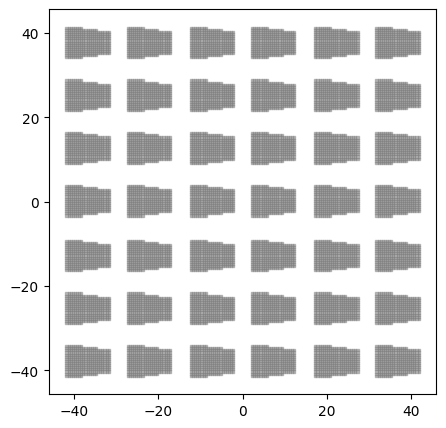

--------------------------------------------------
label: VentHole Chromosome_155: ['CircleShape_155', 'GridStrictTransformation_274']
predict: (0.2893046718760599, 373.18347819999985, 457.89011809999994)
biased_fitness: 0.618036966535162, fitness: 0.7015852997394019
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


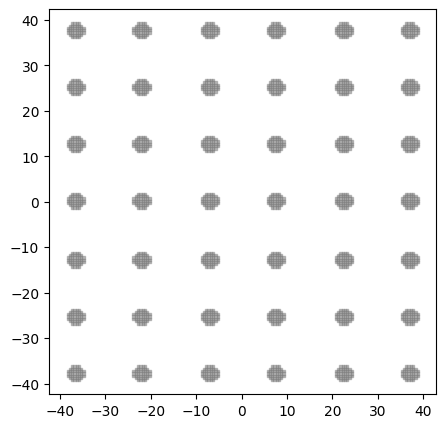

--------------------------------------------------
label: VentHole Chromosome_468: ['CircleShape_468', 'GridStrictTransformation_36']
predict: (0.29084418707458015, 373.3730525999999, 457.4826441999997)
biased_fitness: 0.5963508295558789, fitness: 0.6872796452542005
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


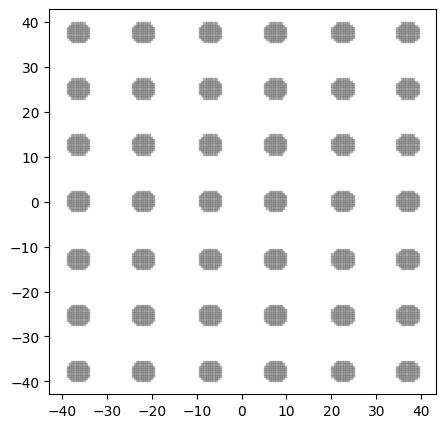

--------------------------------------------------
label: VentHole Chromosome_152: ['DoubleParabolicShape_301', 'GridStrictTransformation_385']
predict: (0.29297817238944224, 373.3575266000002, 456.0444444000001)
biased_fitness: 0.5694290647478074, fitness: 0.6732084211055761
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


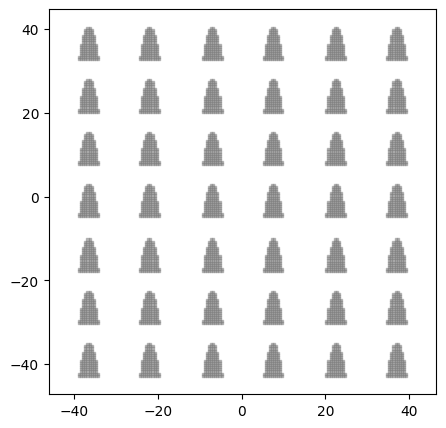

--------------------------------------------------
label: VentHole Chromosome_155: ['RayShape_162', 'GridStrictTransformation_36']
predict: (0.28987019450806306, 373.12285119999984, 455.95985680000007)
biased_fitness: 0.6142833072871177, fitness: 0.7058845149193698
shape parameter:
parameter_list: [ upper_slope: 1.9871328282748988, nose_point: 2.769913012830999, lower_coefficient: 3.069841299900212, lower_x-intercept: 1.79713333010675, lower_y-intercept: 1.473296879126617, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


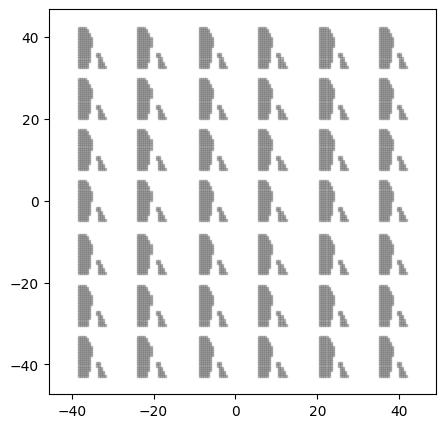

--------------------------------------------------
label: VentHole Chromosome_385: ['CircleShape_468', 'GridStrictTransformation_36']
predict: (0.29165586685748446, 373.18194549999987, 460.6478368)
biased_fitness: 0.5796124628952181, fitness: 0.664292419925156
shape parameter:
parameter_list: [ r: 2.443743986267, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


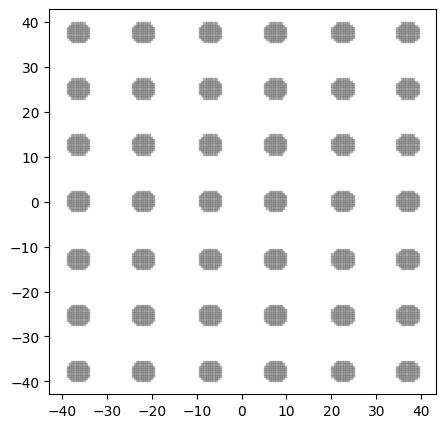

--------------------------------------------------
label: VentHole Chromosome_155: ['DonutShape_36', 'GridStrictTransformation_290']
predict: (0.29569271687446563, 373.2788661, 460.2198178000001)
biased_fitness: 0.5234679976574808, fitness: 0.625579411755343
shape parameter:
parameter_list: [ r_inner: 4.1694065966568505, r_outer: 7.075819193321347, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


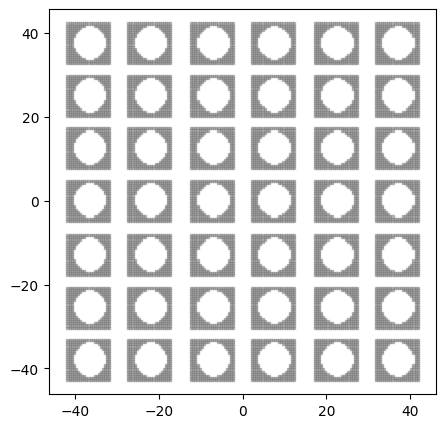

--------------------------------------------------
label: VentHole Chromosome_152: ['DoubleParabolicShape_36', 'GridStrictTransformation_155']
predict: (0.2917250808092611, 373.5790289999997, 459.8895357999999)
biased_fitness: 0.5781746520703465, fitness: 0.665406367907391
shape parameter:
parameter_list: [ lower_coefficient: 1.1055837632973202, upper_coefficient: 1.7125178835157735, lower_y-intercept: 1.0461421643055413, upper_y-intercept_from_lower_y: 1.6301867079183991, lower_x_trans: 4.724759529587693, ]
pattern parameter:
parameter_list: [ dx: 4.733346303070232, dy: 2.578718666309455, ]


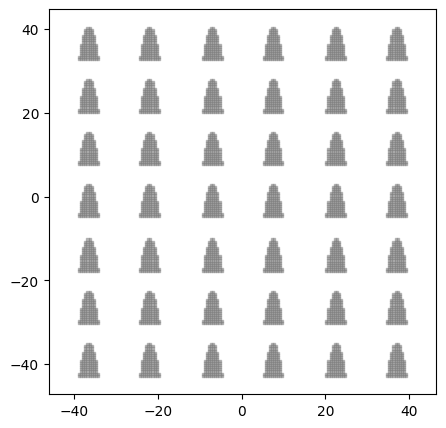

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )